In [1]:
# pandas is a well-known python library for data manipulation and analysis
# It is used to load, and analyze data ususally stored in dataframes
# The dataframes are tables with rows and columns
# The rows are called samples or observations
# The columns are called features or variables
import pandas as pd

In [2]:
# Uncomment the following line to install the ucimlrepo package
# !pip install ucimlrepo

# 1st Dataset

In [3]:
# https://archive.ics.uci.edu/dataset/58/lenses

# ucimlrepo is a python package that allows us to fetch datasets from the UCI Machine Learning Repository
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
lenses = fetch_ucirepo(id=58) 
  
# data is a dictionary with features and targets
# We store the features in X and the targets in y
X = lenses.data.features 
y = lenses.data.targets 
  
# metadata 
print(lenses.metadata) 
  
# variable information 
print(lenses.variables) 

{'uci_id': 58, 'name': 'Lenses', 'repository_url': 'https://archive.ics.uci.edu/dataset/58/lenses', 'data_url': 'https://archive.ics.uci.edu/static/public/58/data.csv', 'abstract': 'Database for fitting contact lenses', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 24, 'num_features': 3, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5K88Z', 'creators': ['J. Cendrowska'], 'intro_paper': None, 'additional_info': {'summary': 'The examples are complete and noise free. The examples highly simplified the problem. The attributes do not fully describe all the factors affecting the decision as to which type, if any, to fit.\r\n\r\n Notes:  \r\n\r\n--This database is complete (all possible combinations of attribute-value pairs are re

In [4]:
# Display the first 5 rows of the features
X.head()

,age,spectacle_prescription,astigmatic
1,1,1,1
2,1,1,2
3,1,2,1
4,1,2,2
5,2,1,1


In [5]:
# Display the first 5 rows of the targets
y.head()

,class
1,3
2,2
3,3
4,1
5,3


In [6]:
# Define the mappings for features
# We need these mappings to convert the features (numerical values) to categorical variables
feature_mappings = {
    "age": {1: "young", 2: "pre-presbyopic", 3: "presbyopic"},
    "spectacle_prescription": {1: "myope", 2: "hypermetrope"},
    "astigmatic": {1: "no", 2: "yes"}
}
print(feature_mappings)

# Define the mapping for the target
target_mapping = {
    1: "hard contact lenses",
    2: "soft contact lenses",
    3: "no contact lenses"
}
print(target_mapping)

{'age': {1: 'young', 2: 'pre-presbyopic', 3: 'presbyopic'}, 'spectacle_prescription': {1: 'myope', 2: 'hypermetrope'}, 'astigmatic': {1: 'no', 2: 'yes'}}
{1: 'hard contact lenses', 2: 'soft contact lenses', 3: 'no contact lenses'}


In [7]:
# Replace feature values with categories
Xcat = X.replace(feature_mappings)

# Replace target values with categories
ycat = y.replace(target_mapping)

# Display updated data
print("Features (Categorical):")
print(Xcat.head())
print("\nTargets (Categorical):")
print(ycat.head())

Features (Categorical):
              age spectacle_prescription astigmatic
1           young                  myope         no
2           young                  myope        yes
3           young           hypermetrope         no
4           young           hypermetrope        yes
5  pre-presbyopic                  myope         no

Targets (Categorical):
                 class
1    no contact lenses
2  soft contact lenses
3    no contact lenses
4  hard contact lenses
5    no contact lenses


# Second Dataset

In [8]:
# # After running for the first dataset, uncomment the following lines to load the second dataset, and run the code after this
# weather = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/weather-nominal-weka.csv')
# # Xcat are the features (all columns except the target, which is 'play')
# Xcat = weather.drop(columns=['play'])
# # ycat is the target (the column 'play')
# ycat = weather['play']
# # Make ycat a pandas dataframe (not a series). We need this to have a unified way of handling data with one or more columns
# ycat = ycat.to_frame()


In [9]:
print(type(Xcat))
print(type(ycat))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [10]:
Xcat

,age,spectacle_prescription,astigmatic
1,young,myope,no
2,young,myope,yes
3,young,hypermetrope,no
4,young,hypermetrope,yes
5,pre-presbyopic,myope,no
6,pre-presbyopic,myope,yes
7,pre-presbyopic,hypermetrope,no
8,pre-presbyopic,hypermetrope,yes
9,young,myope,no
10,young,myope,yes


In [11]:
ycat

,class
1,no contact lenses
2,soft contact lenses
3,no contact lenses
4,hard contact lenses
5,no contact lenses
6,soft contact lenses
7,no contact lenses
8,hard contact lenses
9,no contact lenses
10,soft contact lenses


In [12]:
print(Xcat.shape)
print(ycat.shape)

(24, 3)
(24, 1)


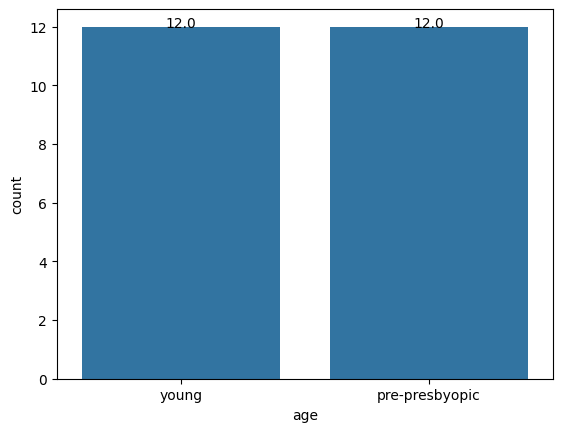

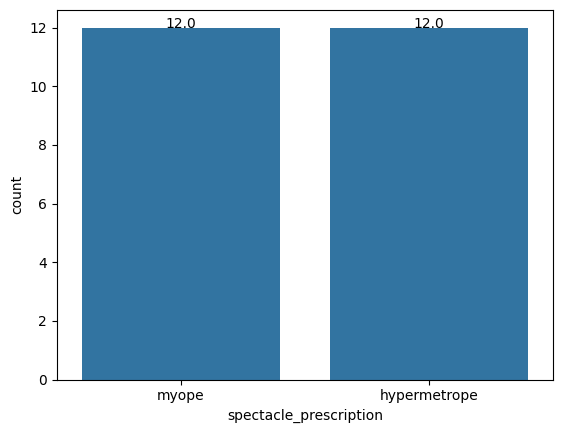

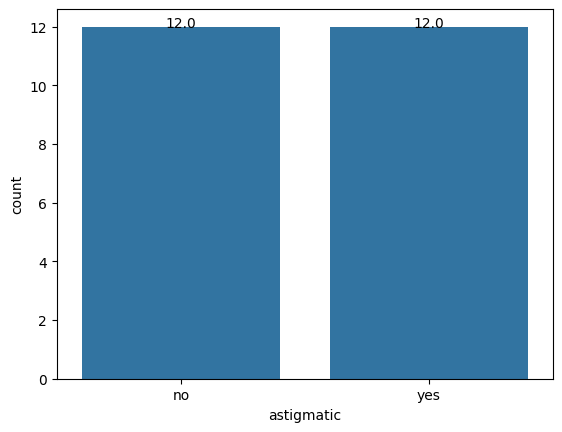

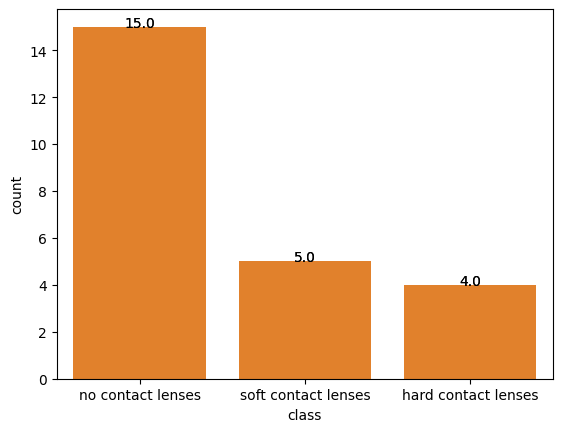

In [13]:
# Visualize the data
import seaborn as sns
import matplotlib.pyplot as plt
# Iterate over the features
for feature in Xcat.columns:
    # ax is the plot
    ax = sns.countplot(x=feature, data=Xcat)
    # Iterate over the patches in the plot. patches are the bars
    for p in ax.patches:
        # Annotate the height of the bar which is the count of the feature
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline')
    plt.show()
# Iterate over the targets
for target in ycat.columns:
    sns.countplot(x=target, data=ycat)
    ax = sns.countplot(x=target, data=ycat)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline')
    plt.show()


In [14]:
# Encode the categorical variables using one-hot encoding
XcatEncoded = pd.get_dummies(Xcat)
# Display the encoded data
XcatEncoded.head()

,age_pre-presbyopic,age_young,spectacle_prescription_hypermetrope,spectacle_prescription_myope,astigmatic_no,astigmatic_yes
1,False,True,False,True,True,False
2,False,True,False,True,False,True
3,False,True,True,False,True,False
4,False,True,True,False,False,True
5,True,False,False,True,True,False


In [15]:
# Combine the features and the target
import numpy as np
# Combine the features and the target
data_combined = pd.concat([XcatEncoded, pd.get_dummies(ycat)], axis=1)
# Names of the combined data
all_variable_names = data_combined.columns
# Convert the combined data to a numpy array
data_combined = data_combined.to_numpy()
print(data_combined)
print(all_variable_names)


[[False  True False  True  True False False  True False]
 [False  True False  True False  True False False  True]
 [False  True  True False  True False False  True False]
 [False  True  True False False  True  True False False]
 [ True False False  True  True False False  True False]
 [ True False False  True False  True False False  True]
 [ True False  True False  True False False  True False]
 [ True False  True False False  True  True False False]
 [False  True False  True  True False False  True False]
 [False  True False  True False  True False False  True]
 [False  True  True False  True False False  True False]
 [False  True  True False False  True  True False False]
 [ True False False  True  True False False  True False]
 [ True False False  True False  True False False  True]
 [ True False  True False  True False False  True False]
 [ True False  True False False  True False  True False]
 [False  True False  True  True False False  True False]
 [False  True False  True False

In [16]:
# Convert the combined data to integers
data_combined = data_combined.astype(int)
# Display the combined data
data_combined


array([[0, 1, 0, 1, 1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 1, 0, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 1, 0, 1, 0]])

# Associations between all features and targets

In [17]:
# Initialize the accuracy matrix with zeros. Dimensions are the number of features and targets (combined data)
accuracy_matrix = np.zeros((len(all_variable_names), len(all_variable_names)))
# Iterate over the combined data
for i in range(len(all_variable_names)):
    # Iterate over the combined data
    for j in range(len(all_variable_names)):
        # Calculate the accuracy of the association between the two features
        # The accuracy is the mean of the equality of the two features, which is 1 if they are equal and 0 if they are not
        accuracy_matrix[i, j] = np.mean(data_combined[:, i] == data_combined[:, j])
# Display the accuracy matrix
accuracy_matrix



array([[1.        , 0.        , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.41666667, 0.54166667, 0.54166667],
       [0.        , 1.        , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.58333333, 0.45833333, 0.45833333],
       [0.5       , 0.5       , 1.        , 0.        , 0.5       ,
        0.5       , 0.66666667, 0.54166667, 0.29166667],
       [0.5       , 0.5       , 0.        , 1.        , 0.5       ,
        0.5       , 0.33333333, 0.45833333, 0.70833333],
       [0.5       , 0.5       , 0.5       , 0.5       , 1.        ,
        0.        , 0.33333333, 0.875     , 0.29166667],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.        ,
        1.        , 0.66666667, 0.125     , 0.70833333],
       [0.41666667, 0.58333333, 0.66666667, 0.33333333, 0.33333333,
        0.66666667, 1.        , 0.20833333, 0.625     ],
       [0.54166667, 0.45833333, 0.54166667, 0.45833333, 0.875     ,
        0.125     , 0.20833333, 1.        , 0.16666667],


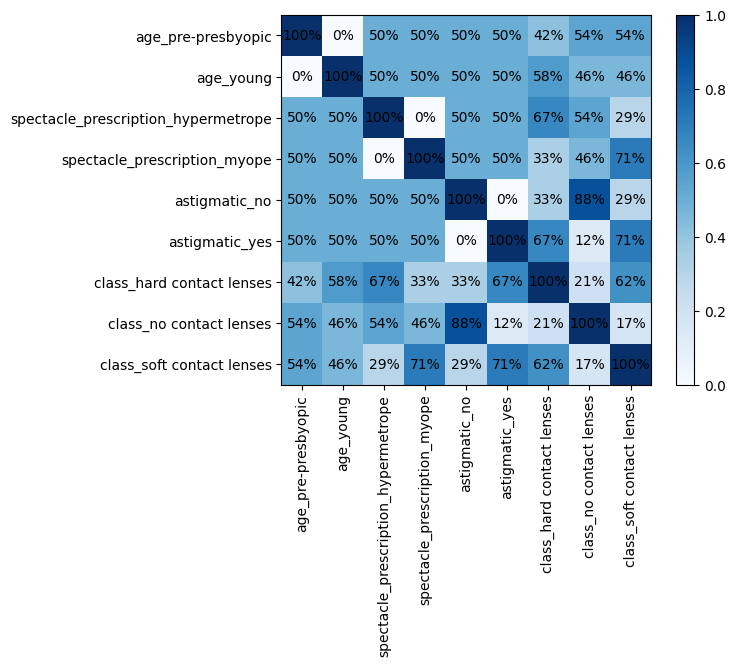

In [18]:
# Visualize the accuracy matrix
plt.imshow(accuracy_matrix, cmap='Blues', interpolation='nearest')
# Add the variable names to the plot
plt.xticks(range(len(all_variable_names)), all_variable_names, rotation=90)
plt.yticks(range(len(all_variable_names)), all_variable_names)
# Add the accuracy values to the plot
for i in range(len(all_variable_names)):
    for j in range(len(all_variable_names)):
        # Display the accuracy as a percentage
        plt.text(j, i, f'{100*accuracy_matrix[i, j]:.0f}%', ha='center', va='center', color='black')
plt.colorbar()
plt.show()



In [19]:
# Top i,j, pairs with the highest accuracy, except main diagonal
nof_pairs = 2
# Set the values above the diagonal to 0
accuracy_matrix = np.tril(accuracy_matrix, k=0)

# Get the indices and values of the top accuracy pairs
flat_indices = np.dstack(np.unravel_index(np.argsort(accuracy_matrix.ravel())[::-1], accuracy_matrix.shape))[0]
top_pairs = [(i, j, accuracy_matrix[i, j]) for i, j in flat_indices if accuracy_matrix[i, j] > -1 and accuracy_matrix[i, j] < 1]

print(top_pairs[:nof_pairs])


[(np.int64(7), np.int64(4), np.float64(0.875)), (np.int64(8), np.int64(5), np.float64(0.7083333333333334))]


In [20]:
# Print the top nof_pairs values in the data_combined array
print(data_combined[:, top_pairs[0][0]])
print(data_combined[:, top_pairs[0][1]])



[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1]
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


class_no contact lenses and astigmatic_no have an accuracy of 0.88


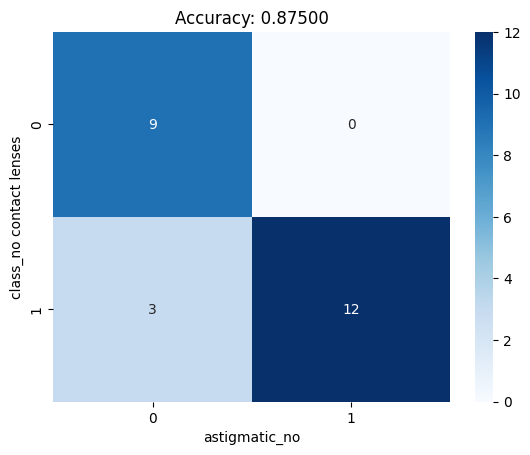

class_soft contact lenses and astigmatic_yes have an accuracy of 0.71


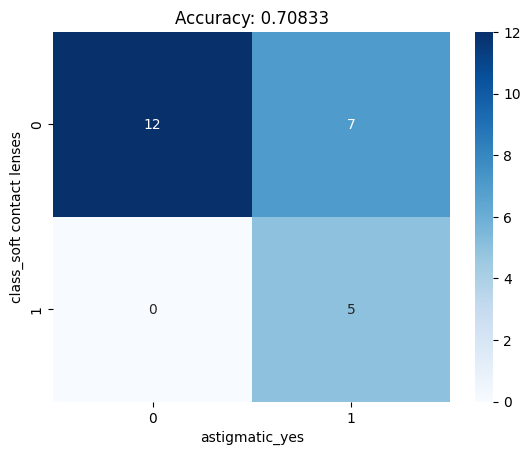

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
for i, j, acc in top_pairs[:nof_pairs]:
    print(f"{all_variable_names[i]} and {all_variable_names[j]} have an accuracy of {acc:.2f}")
    # Calculate the confusion matrix cm
    cm = confusion_matrix(data_combined[:, i], data_combined[:, j])
    # Display the confusion matrix, using seaborn's heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # Add the variable names to the plot
    plt.xlabel(all_variable_names[j])
    plt.ylabel(all_variable_names[i])
    # Add the accuracy to the plot as a title
    plt.title(f"Accuracy: {accuracy_score(data_combined[:, i], data_combined[:, j]):.5f}")
    plt.show()

# Train a decision tree classifier

In [22]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(XcatEncoded, ycat, test_size=0.2, random_state=42)

# Create a decision tree classifier
# max_depth is the maximum depth of the tree
clf = DecisionTreeClassifier(max_depth=3)

clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


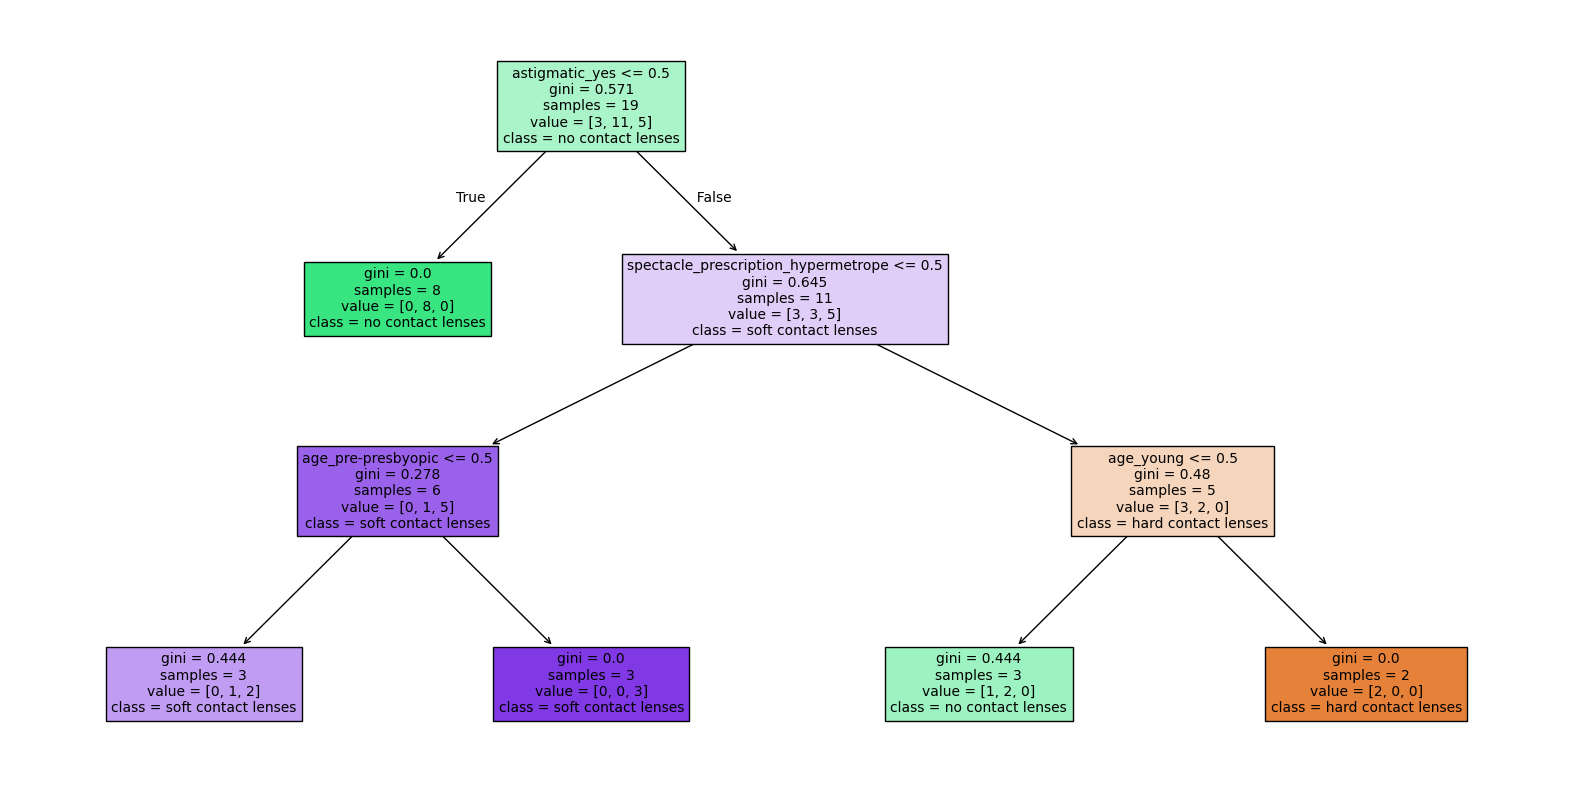

In [23]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=XcatEncoded.columns, 
          class_names=np.unique(ycat.values), fontsize=10)
plt.show()


In [24]:
from sklearn.tree import export_text
tree_rules = export_text(clf, feature_names=list(XcatEncoded.columns))
print(tree_rules)

|--- astigmatic_yes <= 0.50
|   |--- class: no contact lenses
|--- astigmatic_yes >  0.50
|   |--- spectacle_prescription_hypermetrope <= 0.50
|   |   |--- age_pre-presbyopic <= 0.50
|   |   |   |--- class: soft contact lenses
|   |   |--- age_pre-presbyopic >  0.50
|   |   |   |--- class: soft contact lenses
|   |--- spectacle_prescription_hypermetrope >  0.50
|   |   |--- age_young <= 0.50
|   |   |   |--- class: no contact lenses
|   |   |--- age_young >  0.50
|   |   |   |--- class: hard contact lenses



# Task: Find the top $N$ pairs between the among the features and the targets!

In [25]:
# Your solution here:
